In [ ]:
#import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('bank.xlsx') #Read excel file

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
has_duplicates = df.duplicated().any()
print(has_duplicates)

False


In [ ]:
df['y'].value_counts()

,count
y,
no,4000
yes,521


In [ ]:
df['target'] = df['y'].apply(lambda x : 1 if x == 'yes' else 0)  # Convert to numeric
df = df.drop('y',axis=1)

df['target'] = pd.to_numeric(df['target'], errors="coerce") #add

In [ ]:
df['target'] #add

,target
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


# Data Outlier Check

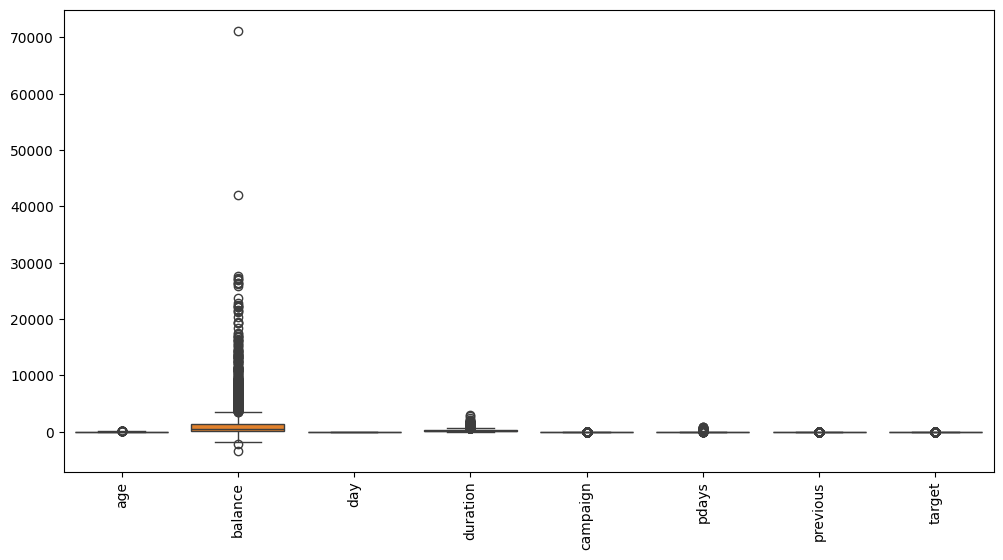

In [ ]:
# box plots to check outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

[   1   10   16   25   30   38   40   49   62   64   72   93   94   96
  102  103  117  129  139  153  161  174  176  182  194  196  199  210
  213  221  238  241  242  258  262  272  276  278  290  292  294  300
  308  310  325  339  343  358  364  367  368  378  381  382  386  397
  399  400  412  414  427  440  450  456  468  470  473  477  496  497
  500  504  519  525  540  548  554  561  567  602  619  620  621  626
  631  647  650  669  670  679  682  686  688  696  707  709  714  717
  744  787  790  822  837  839  846  848  864  866  871  874  875  877
  889  892  899  900  915  922  924  926  928  939  954  963  967  969
  973  991 1005 1010 1021 1031 1039 1056 1067 1069 1099 1102 1113 1115
 1118 1119 1121 1122 1132 1140 1150 1166 1177 1179 1196 1203 1206 1208
 1211 1216 1228 1239 1257 1263 1265 1276 1300 1306 1312 1326 1375 1383
 1393 1407 1412 1422 1429 1433 1446 1451 1457 1470 1478 1480 1483 1489
 1492 1496 1512 1530 1535 1548 1553 1562 1574 1585 1592 1600 1603 1606
 1609 

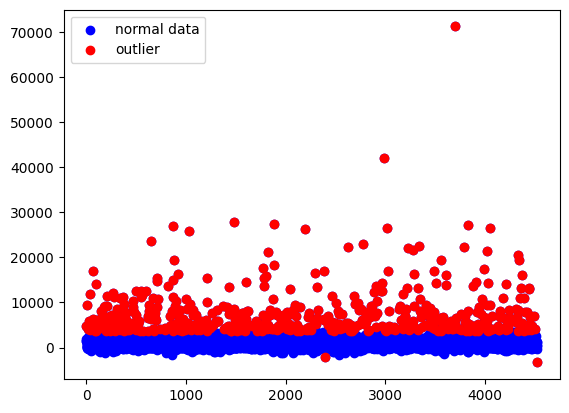

In [ ]:
data = df['balance']
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = np.where((data < lower_bound) | (data > upper_bound))[0]
print(outliers_iqr)

# IQR result
plt.scatter(range(len(data)), data, c='blue', label='normal data')
plt.scatter(outliers_iqr, data[outliers_iqr], c='red', label='outlier')
plt.legend()
plt.show()

In [ ]:
# considering the significant information of some outliers of 'balance'and considering the biased influence on woe featuring engineer, I just delete the value > 40000
df = df[df['balance'] <= 40000]

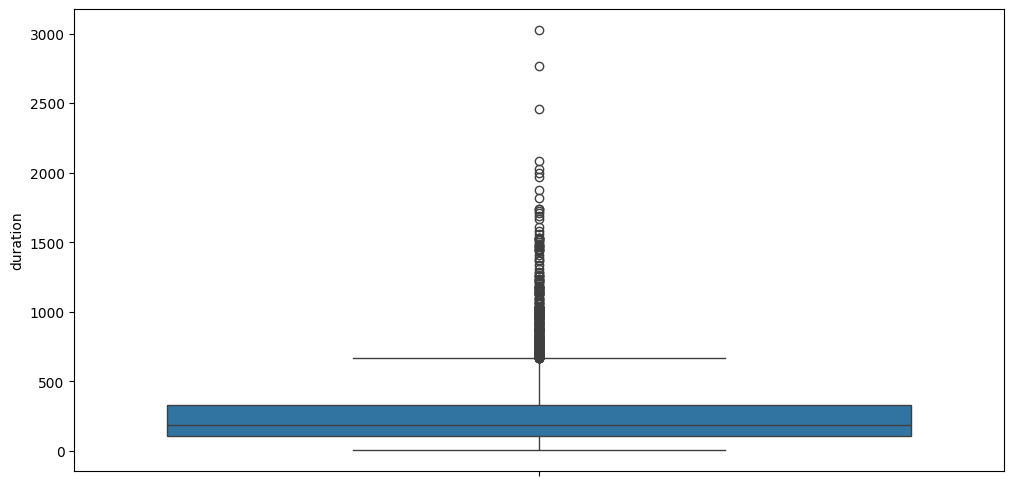

In [ ]:
# box plots to check outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['duration'])
plt.xticks(rotation=90)
plt.show()

[  30   33   38   50   51   78   99  123  125  164  202  203  218  233
  241  244  259  276  295  297  298  306  312  327  328  333  354  369
  401  415  429  450  465  466  494  509  511  517  526  541  555  568
  580  589  630  634  645  659  661  663  665  702  704  705  794  803
  804  823  831  837  850  862  865  886  934  936  959  980  998 1007
 1047 1062 1065 1085 1099 1126 1139 1156 1168 1173 1175 1192 1205 1206
 1249 1274 1278 1279 1296 1297 1300 1302 1312 1315 1319 1333 1334 1349
 1383 1390 1403 1407 1411 1412 1418 1431 1434 1437 1440 1441 1445 1446
 1449 1454 1459 1501 1504 1507 1509 1534 1567 1590 1592 1611 1638 1663
 1669 1706 1719 1722 1723 1755 1763 1846 1855 1863 1864 1876 1877 1886
 1896 1899 1903 1905 1912 1914 1945 1946 1959 1974 1991 1992 1994 2013
 2017 2033 2068 2070 2073 2106 2132 2138 2140 2150 2168 2173 2202 2217
 2219 2220 2228 2233 2254 2259 2268 2274 2286 2296 2324 2347 2370 2372
 2375 2406 2464 2477 2480 2481 2512 2591 2619 2629 2633 2634 2645 2651
 2653 

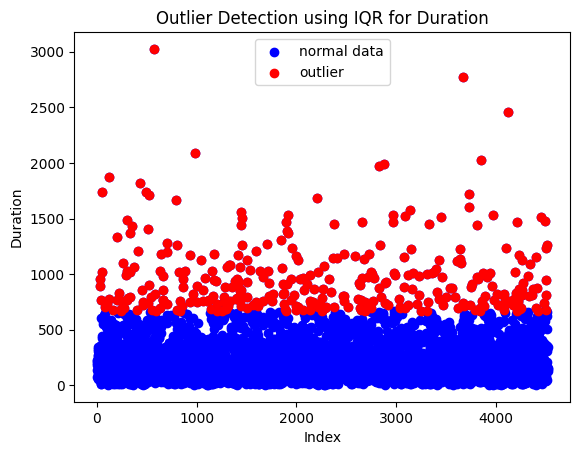

In [ ]:
data_1 = df['duration']

# Compute IQR
Q1 = np.percentile(data_1, 25)
Q3 = np.percentile(data_1, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = np.where((data_1 < lower_bound) | (data_1 > upper_bound))[0]
print(outliers_iqr)

# IQR result
plt.scatter(range(len(data_1)), data_1, c='blue', label='normal data')
plt.scatter(outliers_iqr, data_1.iloc[outliers_iqr], c='red', label='outlier')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Duration")
plt.title("Outlier Detection using IQR for Duration")
plt.show()

In [ ]:
# considering the significant information of some outliers of 'duration'and considering the biased influence on woe featuring engineer, I just delete the value > 2500
df = df[df['duration'] <= 2000]

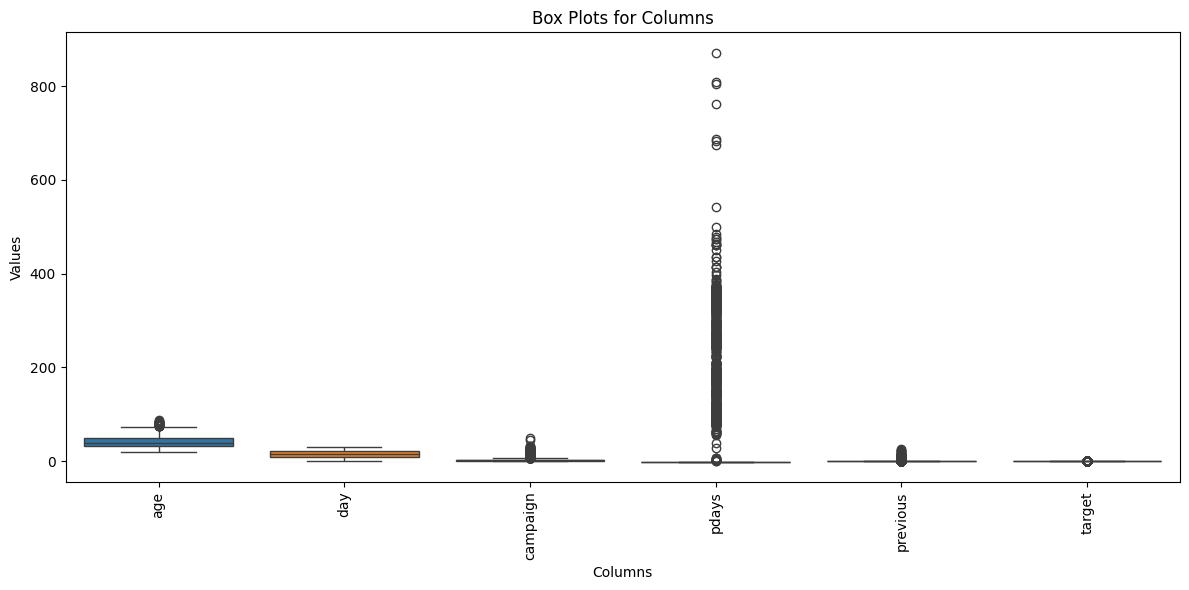

In [ ]:
# box plots to check outlier
columns_to_plot = [col for col in df.columns if col != 'balance' and col != 'duration']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=90)
plt.title('Box Plots for Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

[   1    2    5    6    9   14   17   19   27   38   40   46   49   53
   65   70   76   79   83   97   98  101  105  110  113  124  128  133
  136  148  156  157  164  172  177  179  186  187  188  199  200  202
  203  207  208  212  217  227  229  232  233  236  245  249  253  264
  270  276  289  301  310  314  318  323  325  328  331  337  338  340
  345  347  349  353  354  367  369  374  375  377  380  383  390  394
  397  408  409  412  421  423  433  437  459  464  465  477  482  492
  496  500  510  512  515  518  519  522  528  540  551  552  555  563
  565  572  578  579  596  598  602  614  619  623  629  631  647  649
  650  651  657  658  660  663  665  667  671  672  675  684  685  699
  713  718  724  725  731  738  742  764  765  769  776  798  800  801
  802  804  805  808  814  819  821  822  823  828  837  843  849  855
  857  858  869  874  880  881  883  891  892  893  901  903  906  913
  926  941  942  956  960  967  970  973  984  997  999 1020 1030 1040
 1042 

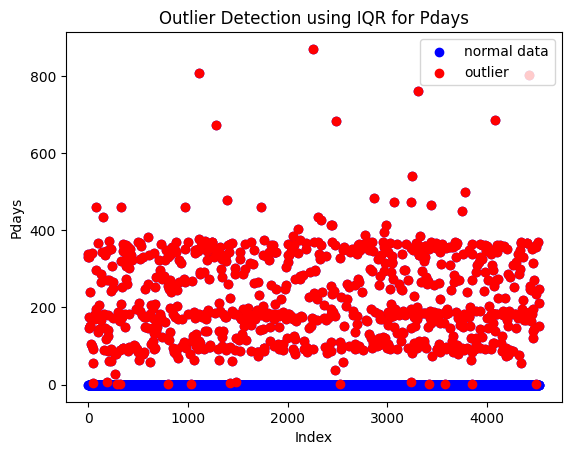

In [ ]:
data_2 = df['pdays']

# Compute IQR
Q1 = np.percentile(data_2, 25)
Q3 = np.percentile(data_2, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = np.where((data_2 < lower_bound) | (data_2 > upper_bound))[0]
print(outliers_iqr)

# IQR result
plt.scatter(range(len(data_2)), data_2, c='blue', label='normal data')
plt.scatter(outliers_iqr, data_2.iloc[outliers_iqr], c='red', label='outlier')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Pdays")
plt.title("Outlier Detection using IQR for Pdays")
plt.show()

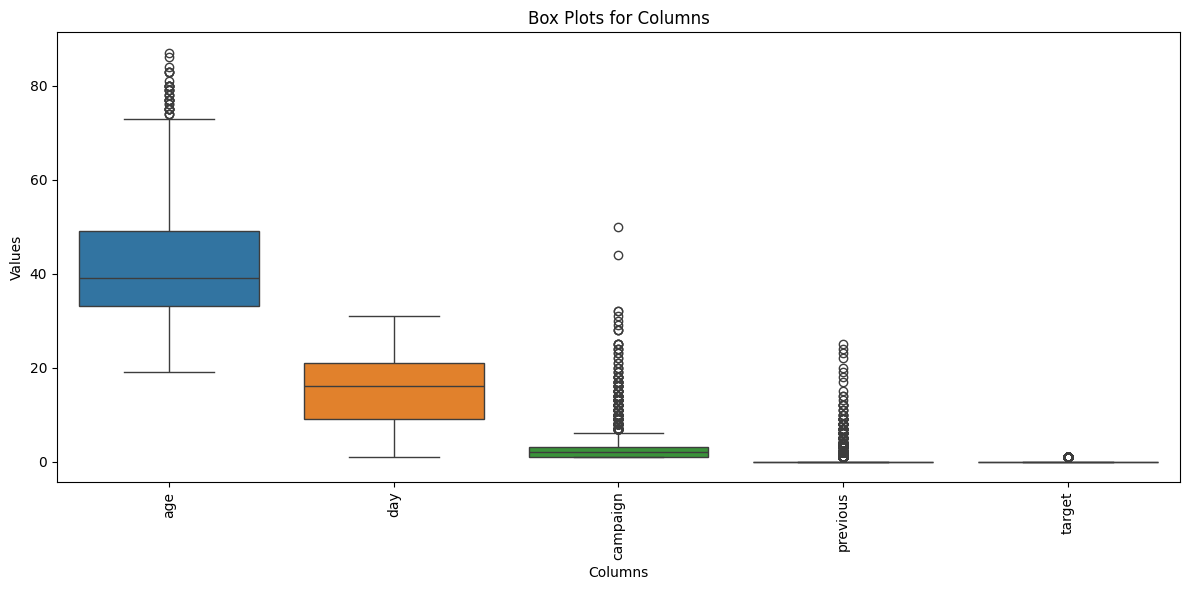

In [ ]:
# box plots to check outlier
columns_to_plot = [col for col in df.columns if col != 'balance' and col != 'duration' and col != 'pdays']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=90)
plt.title('Box Plots for Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

[  39  135  146  176  191  209  218  223  240  242  268  298  310  320
  376  414  442  454  469  483  485  501  514  542  553  556  559  569
  571  586  592  607  621  630  632  633  640  644  655  682  719  750
  751  752  776  790  827  829  840  867  931  939  943  966  973  974
  994  996 1015 1037 1067 1068 1075 1087 1093 1122 1138 1147 1172 1203
 1212 1218 1230 1257 1265 1276 1301 1308 1314 1352 1363 1401 1426 1433
 1447 1481 1483 1488 1492 1493 1495 1526 1547 1553 1559 1562 1563 1589
 1598 1651 1656 1660 1694 1714 1718 1728 1740 1741 1745 1747 1752 1753
 1763 1768 1776 1781 1784 1795 1796 1810 1816 1822 1828 1850 1867 1890
 1906 1925 1957 1965 1976 1999 2001 2010 2029 2035 2052 2072 2083 2084
 2102 2109 2111 2118 2141 2154 2156 2167 2174 2179 2200 2205 2218 2254
 2265 2269 2276 2292 2308 2315 2320 2326 2332 2344 2347 2359 2364 2366
 2387 2397 2414 2452 2487 2492 2504 2548 2552 2572 2574 2578 2591 2616
 2617 2621 2680 2705 2731 2738 2741 2769 2783 2797 2808 2812 2826 2844
 2887 

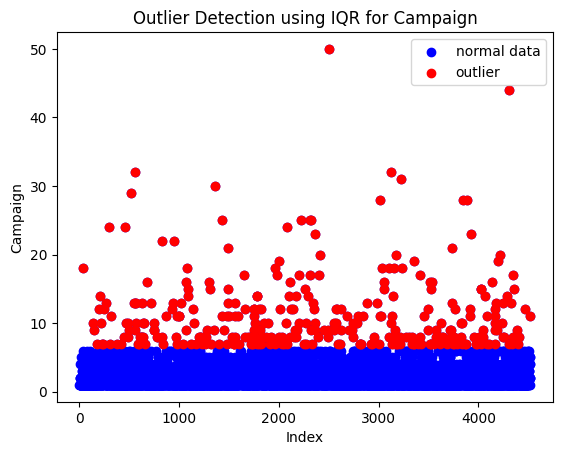

In [ ]:
data_3 = df['campaign']

# Compute IQR
Q1 = np.percentile(data_3, 25)
Q3 = np.percentile(data_3, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = np.where((data_3 < lower_bound) | (data_3 > upper_bound))[0]
print(outliers_iqr)

# IQR result
plt.scatter(range(len(data_3)), data_3, c='blue', label='normal data')
plt.scatter(outliers_iqr, data_3.iloc[outliers_iqr], c='red', label='outlier')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Campaign")
plt.title("Outlier Detection using IQR for Campaign")
plt.show()

In [ ]:
# considering the significant information of some outliers of 'campaign'and considering the biased influence on woe featuring engineer, I just delete the value > 40
df = df[df['campaign'] <= 40]

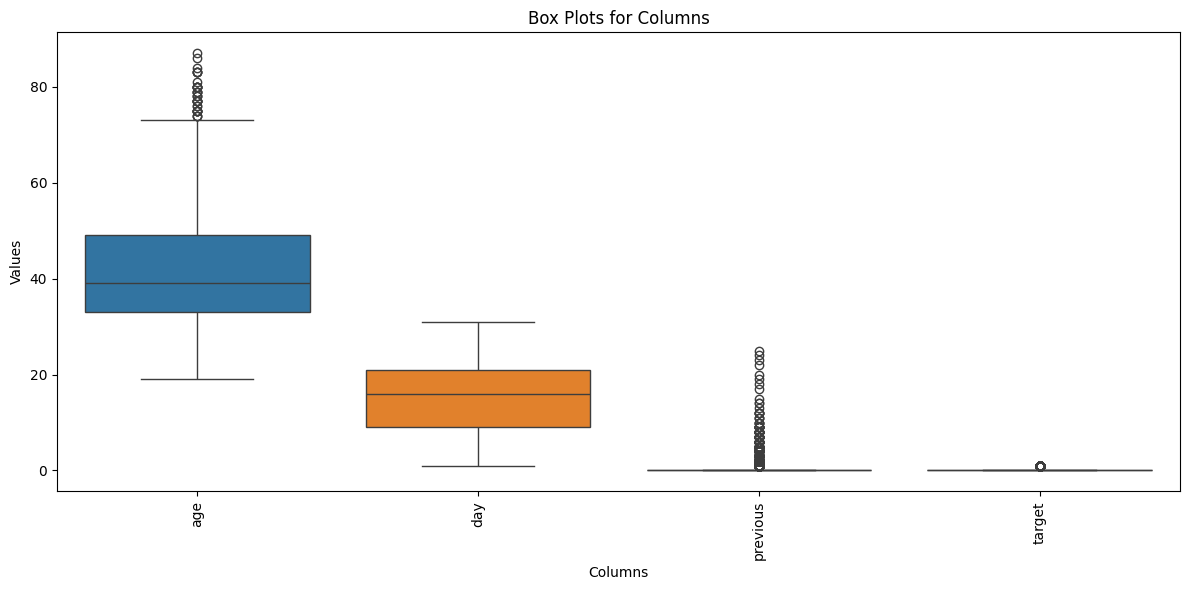

In [ ]:
# box plots to check outlier
columns_to_plot = [col for col in df.columns if col != 'balance' and col != 'duration' and col != 'pdays'and col != 'campaign']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=90)
plt.title('Box Plots for Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


# critical thinking:
When checking for outliers, I identified a few individual anomalies. Since we plan to apply binning later, which will help reduce some extreme values and bring them closer to normal ranges, I decided to remove only a minimal number of outliers to avoid disrupting the binning process.

As for bin method,to make the binning more reasonable, I chose to use a decision tree to determine the split points that have the greatest impact on predicting the target. This approach results in more meaningful binning.

# WOE and IV

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.tree import DecisionTreeClassifier

import traceback
import re
from pandas import Series


def decision_tree_bins(X, Y, max_depth=3, min_samples_leaf=0.05):
    X = X.values.reshape(-1, 1)
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=int(min_samples_leaf * len(X)))
    clf.fit(X, Y)

    thresholds = clf.tree_.threshold
    thresholds = thresholds[thresholds != -2]  # delete inefficient threshold

    if len(thresholds) == 0:  # avoid decision tree having no efficient bins
        return np.linspace(X.min(), X.max(), num=5)

    bins = np.unique(np.concatenate(([X.min()], thresholds, [X.max()])))
    return bins  # Added return statement


In [82]:
def mono_bin(Y, X, method='tree', n=20):
    """
    WOE binning for numerical variables.

    Parameters:
    - Y: Target variable (binary, 0/1)
    - X: Feature variable (numerical)
    - method: 'tree' (Decision Tree-based binning) or 'quantile' (Quantile-based binning)
    - n: Number of bins for quantile binning

    Returns:
    - d3: DataFrame with binning details
    - total_iv: Total Information Value
    """
    df1 = pd.DataFrame({"X": X, "Y": Y})
    notmiss = df1.dropna()

    if len(notmiss) == 0:
        raise ValueError("No non-missing data available for binning")

    # Bin methods
    if method == 'tree':
        X_reshaped = notmiss["X"].values.reshape(-1, 1)
        clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=int(0.05 * len(X_reshaped)))
        clf.fit(X_reshaped, notmiss["Y"])
        thresholds = clf.tree_.threshold
        thresholds = thresholds[thresholds != -2]  # Remove invalid thresholds
        if len(thresholds) == 0:
            bins = np.linspace(notmiss["X"].min(), notmiss["X"].max(), num=5)
        else:
            bins = np.unique(np.concatenate(([notmiss["X"].min()], thresholds, [notmiss["X"].max()])))
    else:
        bins = np.unique(notmiss["X"].quantile(np.linspace(0, 1, n)))
        if len(bins) < 2:
            bins = np.linspace(notmiss["X"].min(), notmiss["X"].max(), num=5)

    bins = np.sort(bins)  # Ensure bins are in ascending order

    # Bin the data
    d1 = pd.DataFrame({
        "X": notmiss["X"],
        "Y": notmiss["Y"],
        "Bucket": pd.cut(notmiss["X"], bins, include_lowest=True)
    })
    d2 = d1.groupby('Bucket', as_index=True, observed=False)

    d3 = pd.DataFrame()
    d3["MIN_VALUE"] = d2["X"].min()
    d3["MAX_VALUE"] = d2["X"].max()
    d3["COUNT"] = d2["Y"].count()
    d3["EVENT"] = d2["Y"].sum()
    d3["NONEVENT"] = d3["COUNT"] - d3["EVENT"]

    # Check for edge cases
    if d3["COUNT"].sum() == 0:
        raise ValueError("No valid observations in the data")

    # Calculate WOE
    epsilon = 1e-10
    d3["EVENT_RATE"] = d3["EVENT"] / d3["COUNT"]
    d3["NON_EVENT_RATE"] = d3["NONEVENT"] / d3["COUNT"]

    total_events = d3["EVENT"].sum()
    total_nonevents = d3["NONEVENT"].sum()
    if total_events == 0 or total_nonevents == 0:
        raise ValueError("All observations are events or non-events; WOE calculation not possible")

    d3["DIST_EVENT"] = d3["EVENT"] / total_events
    d3["DIST_NON_EVENT"] = d3["NONEVENT"] / total_nonevents
    d3["WOE"] = np.log((d3["DIST_EVENT"] + epsilon) / (d3["DIST_NON_EVENT"] + epsilon))

    # Calculate IV
    d3["IV_CONTRIBUTION"] = (d3["DIST_EVENT"] - d3["DIST_NON_EVENT"]) * d3["WOE"]
    total_iv = d3["IV_CONTRIBUTION"].sum()

    # Final DataFrame
    d3 = d3[['MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT',
             'NON_EVENT_RATE', 'DIST_EVENT', 'DIST_NON_EVENT', 'WOE', 'IV_CONTRIBUTION']]
    d3 = d3.replace([np.inf, -np.inf], 0).reset_index(drop=True)

    return d3, total_iv

In [83]:
def char_bin(Y, X, method='default', max_categories=10):
    """
    WOE binning for categorical variables.

    Parameters:
    - Y: Target variable (binary, 0/1)
    - X: Feature variable (categorical)
    - method: 'default' (groupby method) or 'tree' (placeholder for future expansion)
    - max_categories: Maximum number of categories to retain

    Returns:
    - d3: DataFrame with binning details
    - total_iv: Total Information Value
    """
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[df1["X"].isnull()]
    notmiss = df1[df1["X"].notnull()]

    if len(notmiss) == 0:
        raise ValueError("No non-missing data available for binning")

    # Group by categories
    df2 = notmiss.groupby('X', as_index=True)

    d3 = pd.DataFrame()
    d3["COUNT"] = df2["Y"].count()
    d3["CATEGORY"] = df2["Y"].sum().index  # Category names
    d3["EVENT"] = df2["Y"].sum()
    d3["NONEVENT"] = d3["COUNT"] - d3["EVENT"]

    # Handle missing values
    if len(justmiss) > 0:
        d4 = pd.DataFrame({'CATEGORY': np.nan}, index=[0])
        d4["COUNT"] = justmiss["Y"].count()
        d4["EVENT"] = justmiss["Y"].sum()
        d4["NONEVENT"] = d4["COUNT"] - d4["EVENT"]
        d3 = pd.concat([d3, d4], ignore_index=True)

    # Check for edge cases
    if d3["COUNT"].sum() == 0:
        raise ValueError("No valid observations in the data")

    # Calculate WOE
    epsilon = 1e-10
    d3["EVENT_RATE"] = d3["EVENT"] / d3["COUNT"]
    d3["NON_EVENT_RATE"] = d3["NONEVENT"] / d3["COUNT"]

    total_events = d3["EVENT"].sum()
    total_nonevents = d3["NONEVENT"].sum()
    if total_events == 0 or total_nonevents == 0:
        raise ValueError("All observations are events or non-events; WOE calculation not possible")

    d3["DIST_EVENT"] = d3["EVENT"] / total_events
    d3["DIST_NON_EVENT"] = d3["NONEVENT"] / total_nonevents
    d3["WOE"] = np.log((d3["DIST_EVENT"] + epsilon) / (d3["DIST_NON_EVENT"] + epsilon))

    # Calculate IV
    d3["IV_CONTRIBUTION"] = (d3["DIST_EVENT"] - d3["DIST_NON_EVENT"]) * d3["WOE"]
    total_iv = d3["IV_CONTRIBUTION"].sum()

    # Final DataFrame
    d3 = d3[['CATEGORY', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT',
             'NON_EVENT_RATE', 'DIST_EVENT', 'DIST_NON_EVENT', 'WOE', 'IV_CONTRIBUTION']]
    d3 = d3.replace([np.inf, -np.inf], 0).reset_index(drop=True)

    return d3, total_iv

In [84]:
def data_vars(df1, target, binning_method='tree', target_name=None):
    """
    Calculate WOE and IV for all variables in a DataFrame.

    Parameters:
    - df1: Input DataFrame
    - target: Target variable (binary, 0/1)
    - binning_method: 'tree' or 'quantile' for numerical variables
    - target_name: Optional name of target column to exclude

    Returns:
    - iv_df: Detailed binning results for all variables
    - iv: Summary IV per variable
    """
    iv_list = []
    for col in df1.columns:
        if target_name is None or col.upper() != target_name.upper():
            if np.issubdtype(df1[col], np.number) and df1[col].nunique() > 2:
                try:
                    conv, total_iv = mono_bin(target, df1[col], method=binning_method)
                except ValueError as e:
                    print(f"Skipping {col}: {str(e)}")
                    continue
            else:
                try:
                    conv, total_iv = char_bin(target, df1[col])
                except ValueError as e:
                    print(f"Skipping {col}: {str(e)}")
                    continue
            conv["VAR_NAME"] = col
            iv_list.append((conv, col, total_iv))

    if not iv_list:
        print("⚠️ Warning: No valid variables found for IV calculation.")
        return None, None

    iv_df = pd.concat([item[0] for item in iv_list], ignore_index=True)
    iv = pd.DataFrame({
        "VAR_NAME": [item[1] for item in iv_list],
        "IV": [item[2] for item in iv_list]
    })

    return iv_df, iv

In [85]:
def plot_numerical_bins(df, var_name):
    """
    Visualize binning results for a numerical variable.

    Parameters:
    - df: DataFrame from mono_bin (with MIN_VALUE, MAX_VALUE, WOE, etc.)
    - var_name: Name of the variable
    """
    # Prepare data
    df = df.copy()
    df['Bin'] = df.apply(lambda row: f"[{row['MIN_VALUE']:.2f}, {row['MAX_VALUE']:.2f}]", axis=1)

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Plot WOE
    sns.barplot(x='Bin', y='WOE', data=df, ax=ax1, color='skyblue')
    ax1.set_title(f'WOE by Bin for {var_name}')
    ax1.set_ylabel('WOE')
    ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8)

    # Plot Event Rate
    sns.barplot(x='Bin', y='EVENT_RATE', data=df, ax=ax2, color='lightgreen')
    ax2.set_title(f'Event Rate by Bin for {var_name}')
    ax2.set_ylabel('Event Rate')
    ax2.set_xlabel('Bins')

    # Rotate x-axis labels for readability
    for ax in [ax1, ax2]:
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def plot_categorical_bins(df, var_name):
    """
    Visualize binning results for a categorical variable.

    Parameters:
    - df: DataFrame from char_bin (with CATEGORY, WOE, etc.)
    - var_name: Name of the variable
    """
    # Prepare data
    df = df.copy()
    df['CATEGORY'] = df['CATEGORY'].fillna('Missing')  # Handle NaN for missing values

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Plot WOE
    sns.barplot(x='CATEGORY', y='WOE', data=df, ax=ax1, color='skyblue')
    ax1.set_title(f'WOE by Category for {var_name}')
    ax1.set_ylabel('WOE')
    ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8)

    # Plot Event Rate
    sns.barplot(x='CATEGORY', y='EVENT_RATE', data=df, ax=ax2, color='lightgreen')
    ax2.set_title(f'Event Rate by Category for {var_name}')
    ax2.set_ylabel('Event Rate')
    ax2.set_xlabel('Categories')

    # Rotate x-axis labels for readability
    for ax in [ax1, ax2]:
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def plot_iv_summary(iv_df):
    """Updated function with sorting"""
    iv_df_sorted = iv_df.sort_values(by='IV', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='VAR_NAME', y='IV', data=iv_df_sorted, color='salmon')
    plt.title('Information Value (IV) by Variable (Sorted)')
    plt.xlabel('Variables')
    plt.ylabel('IV')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

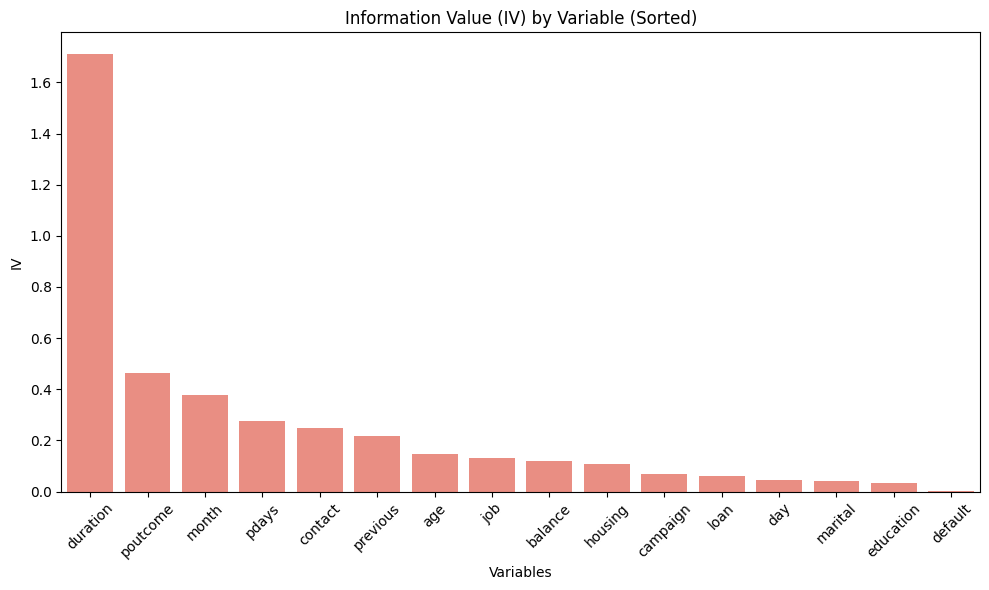

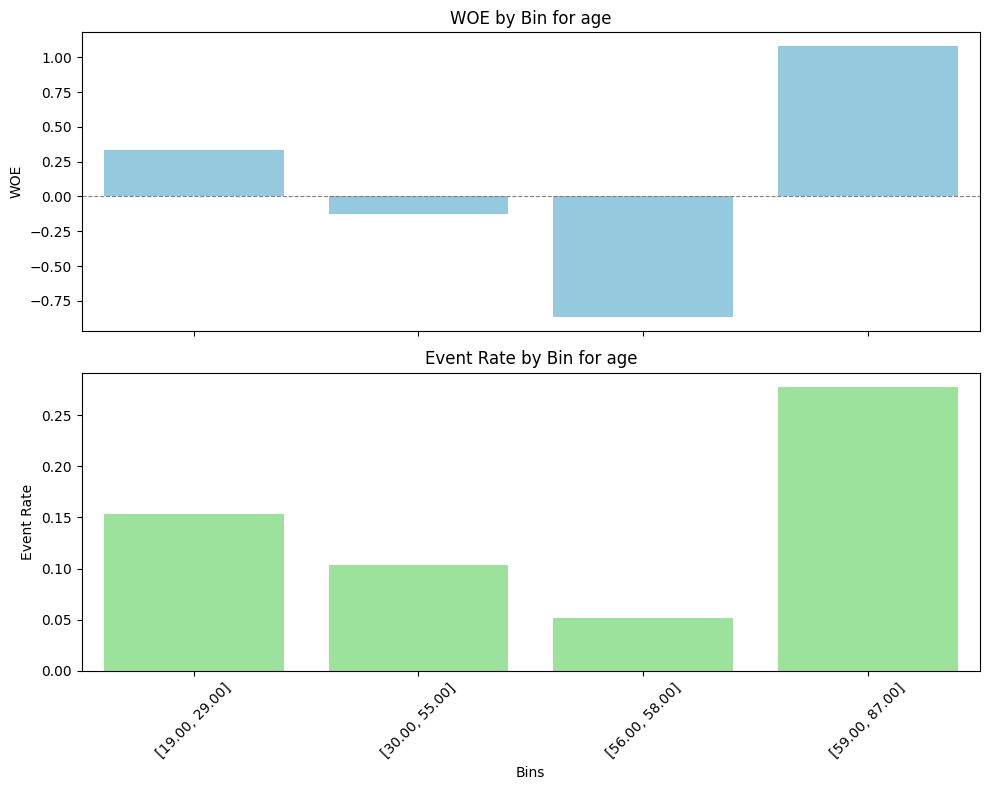

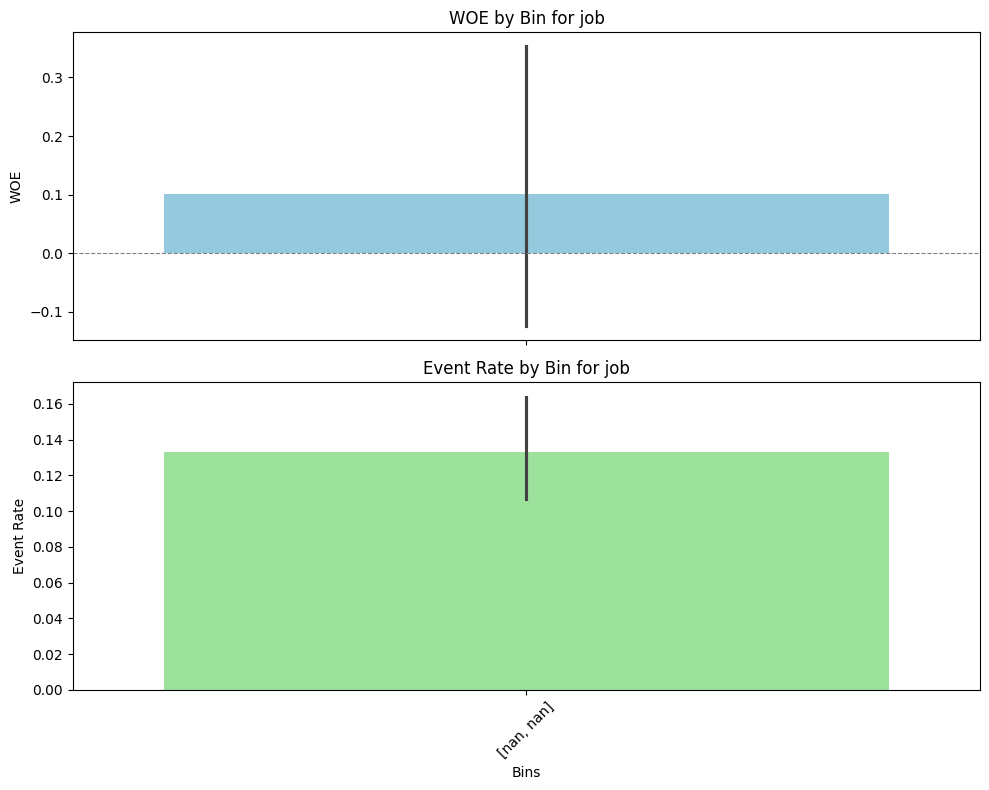

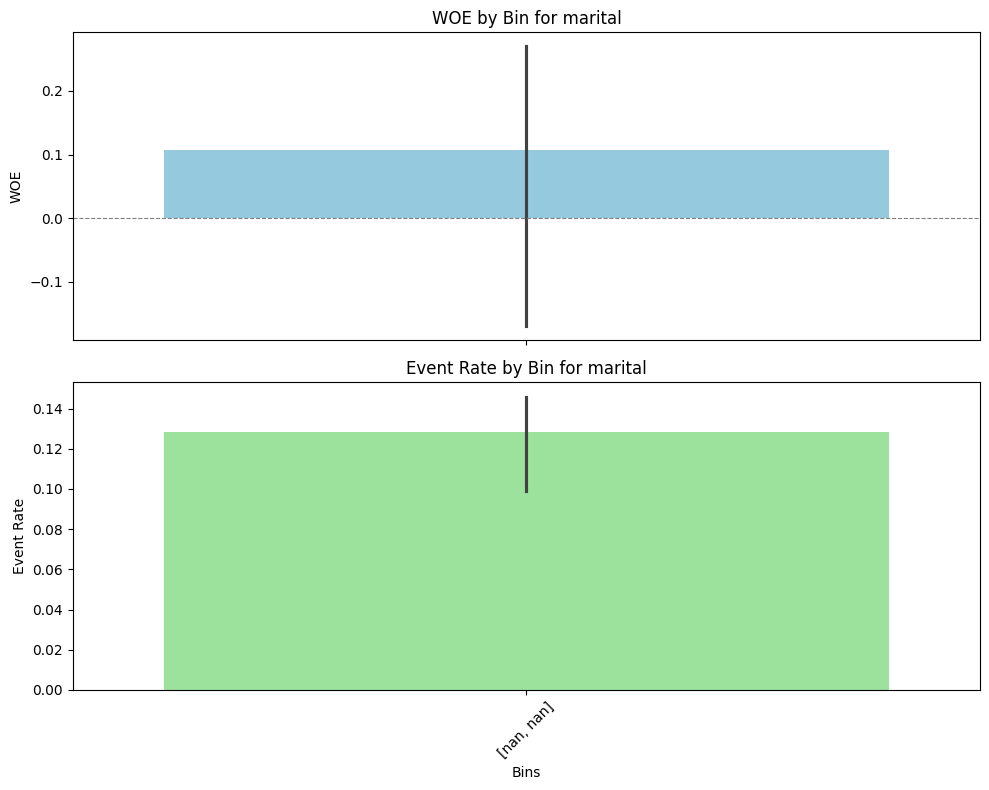

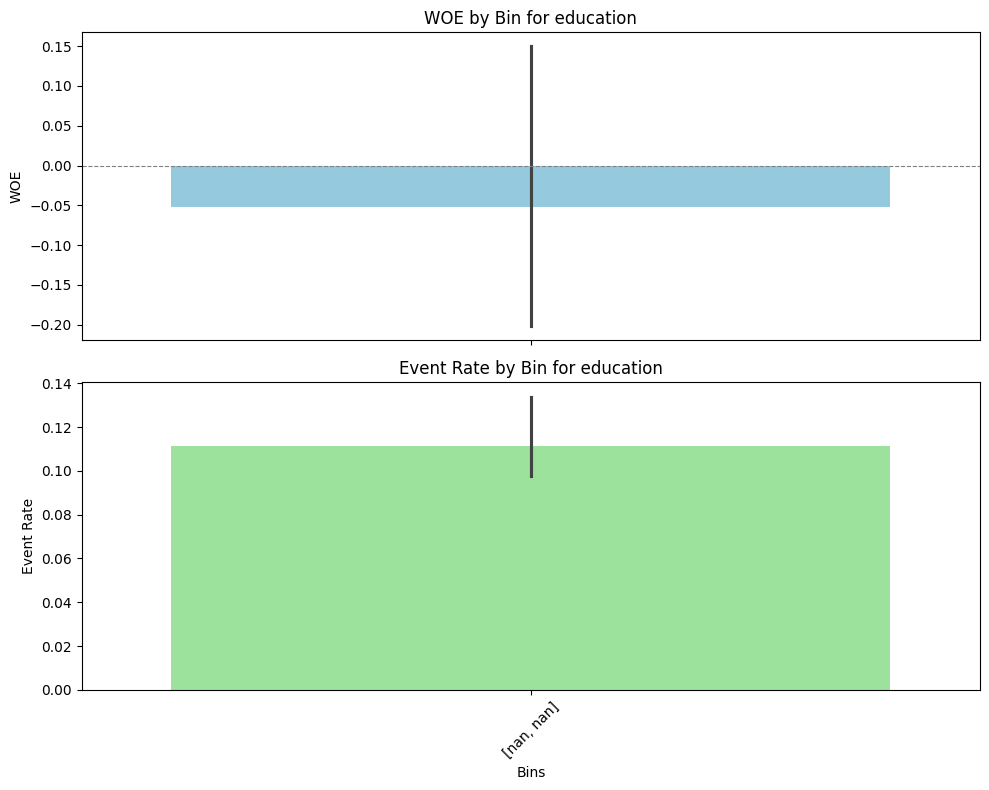

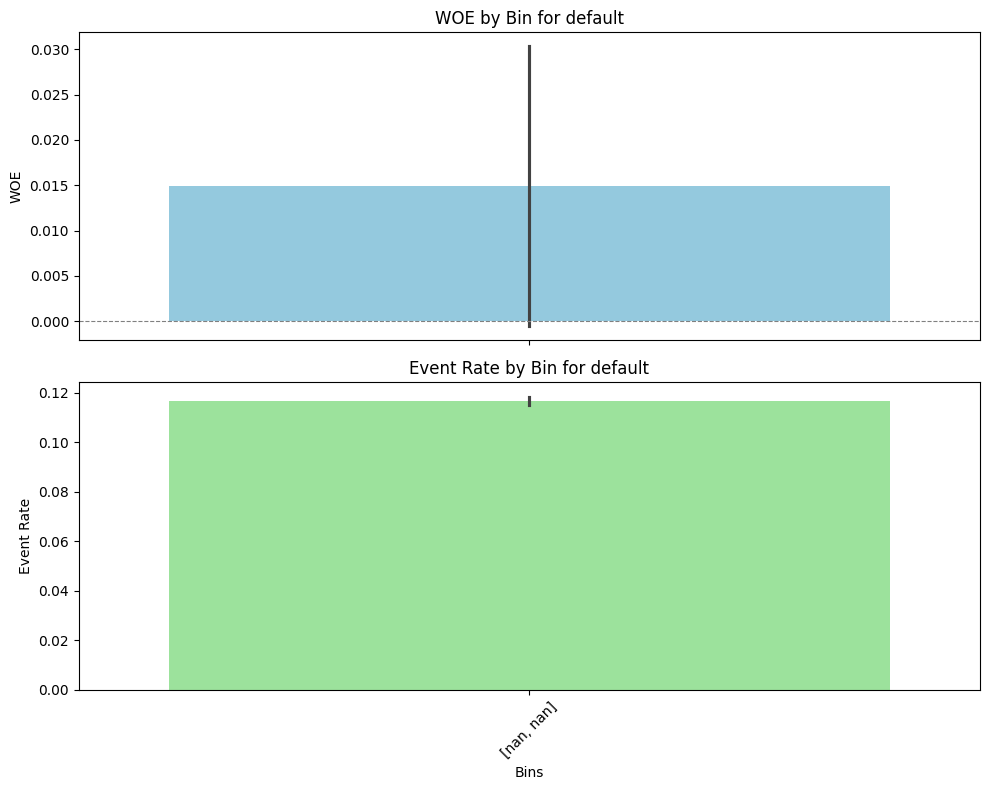

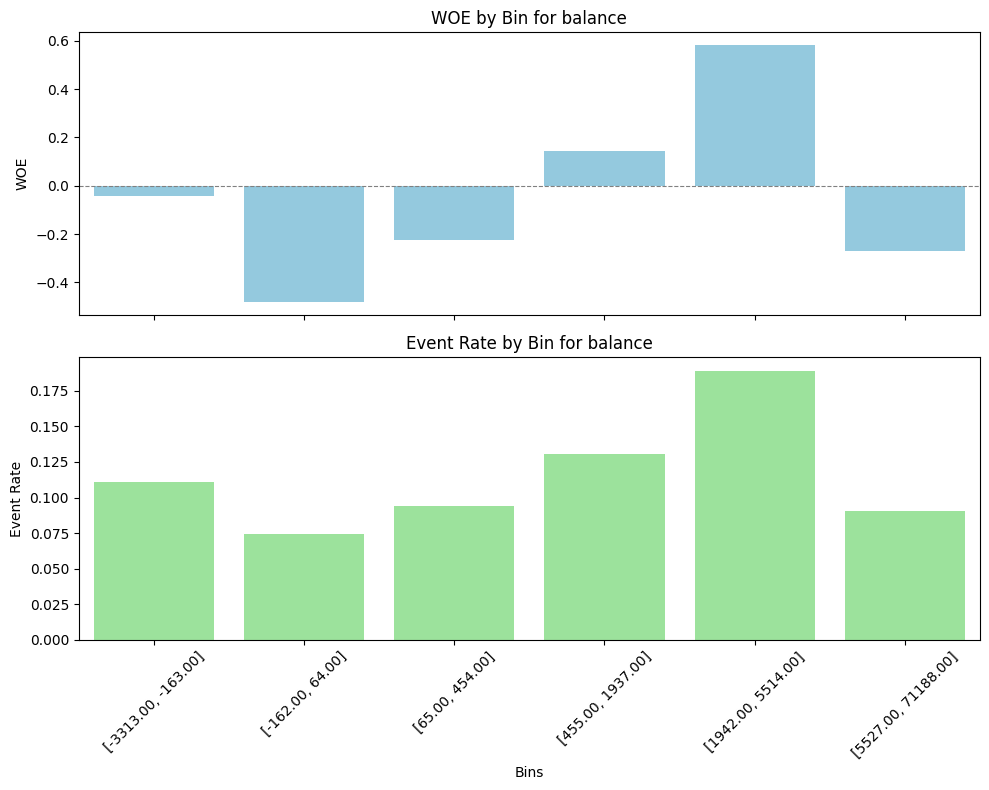

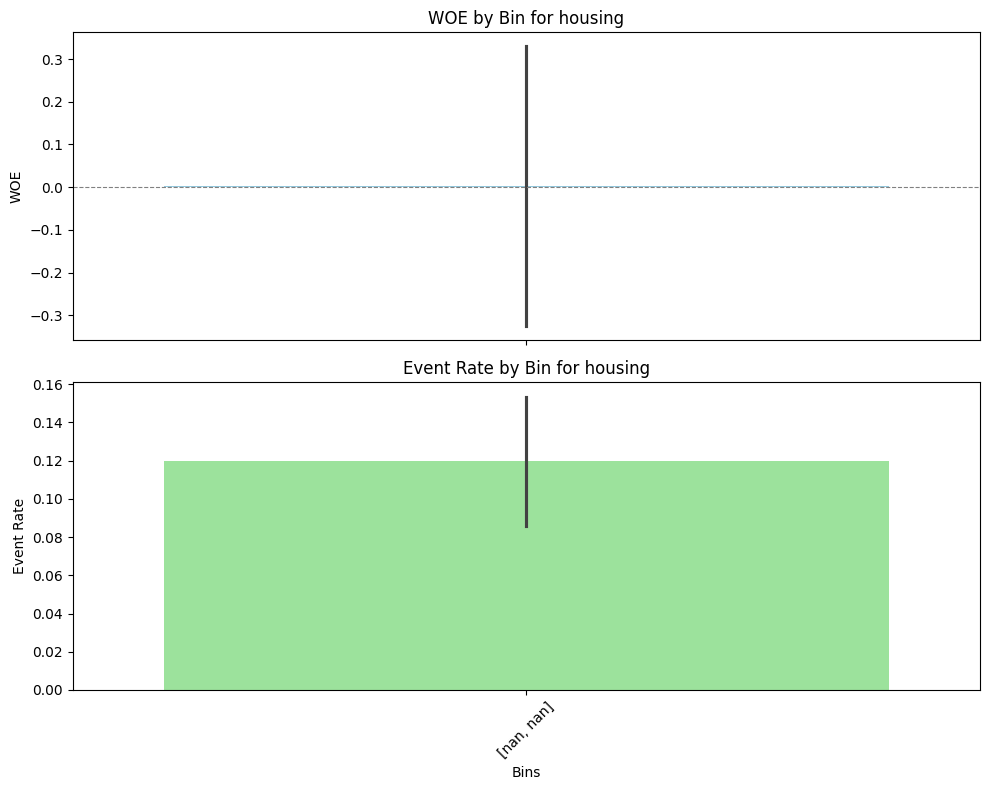

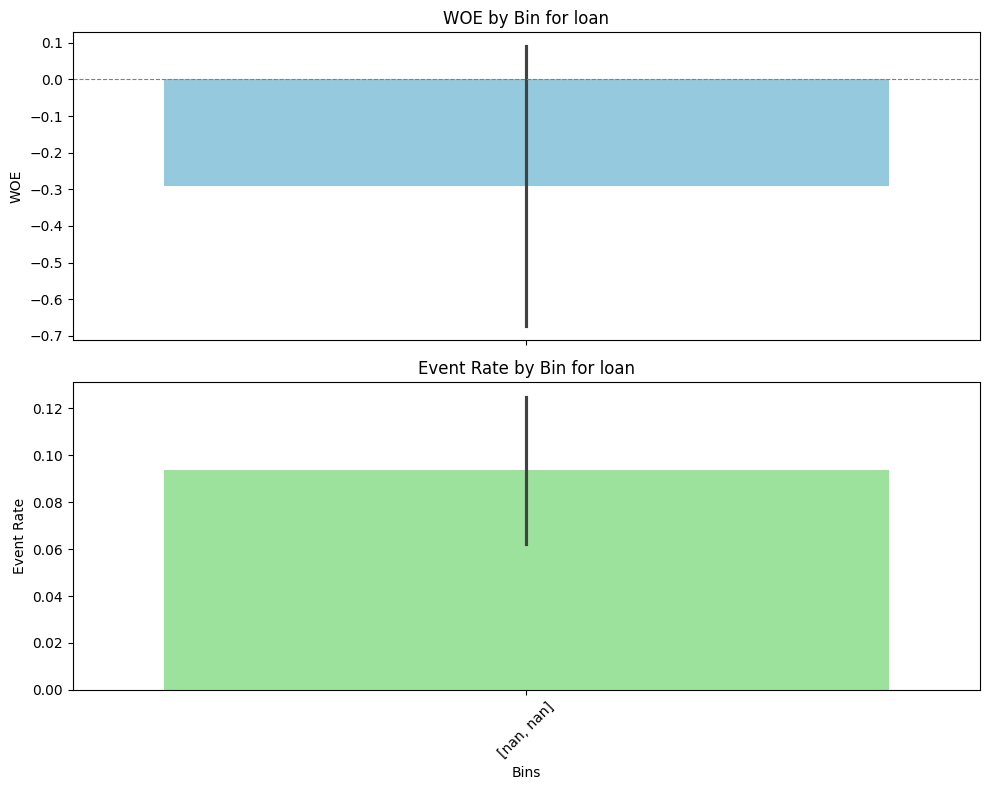

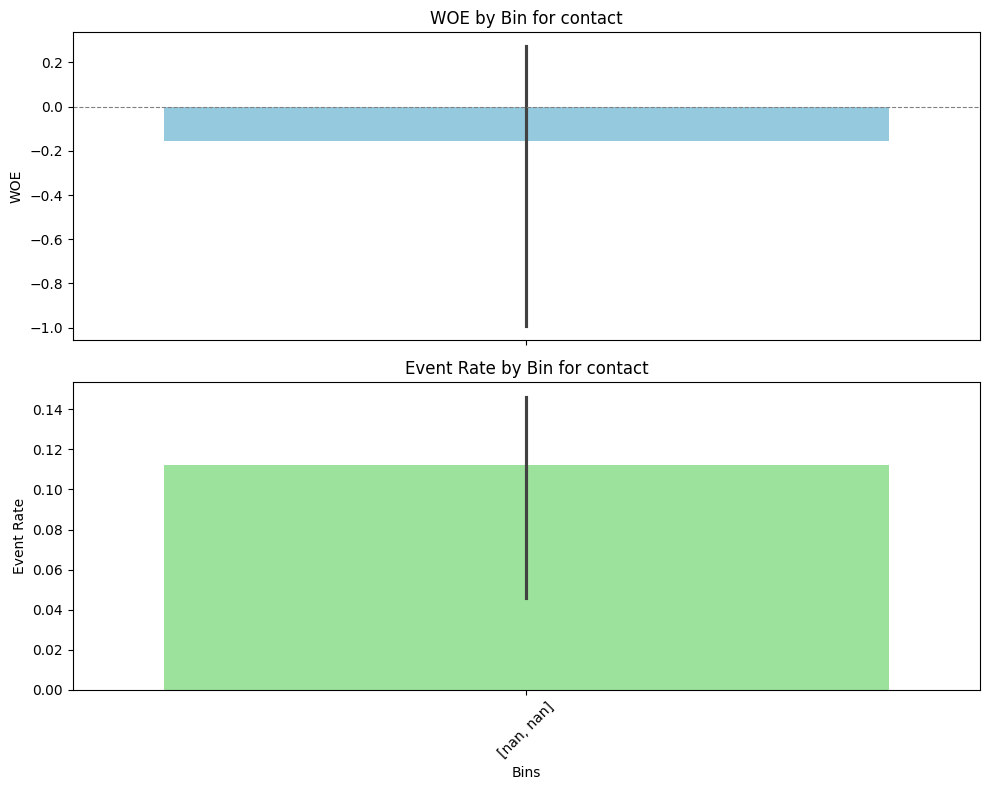

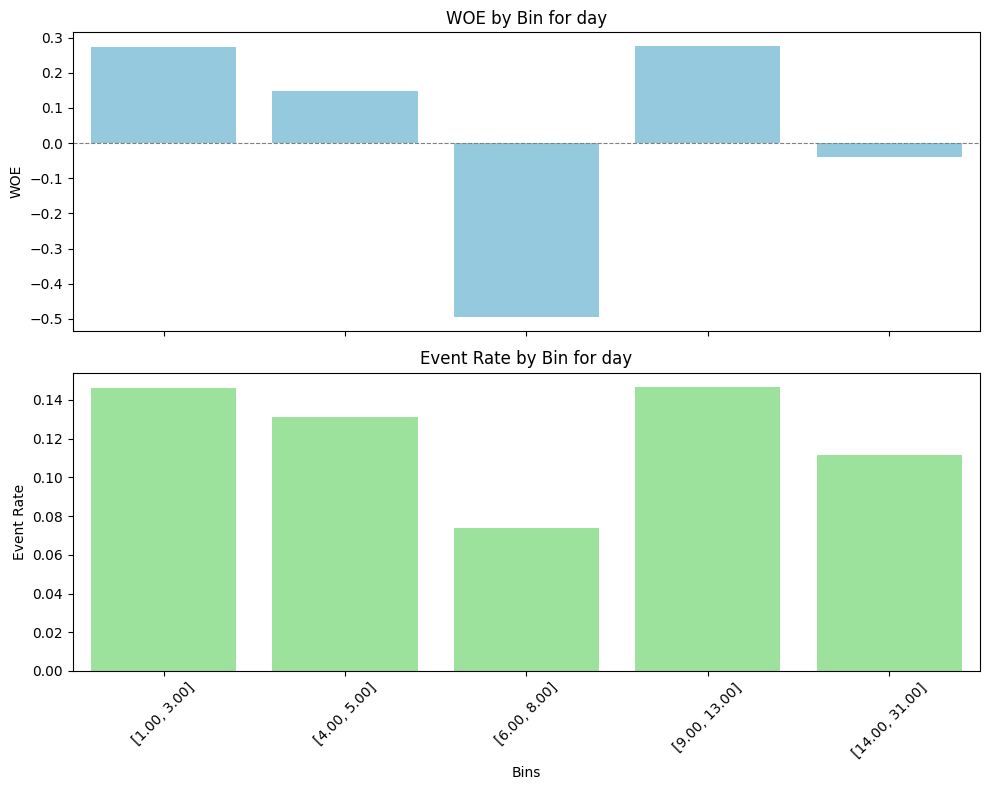

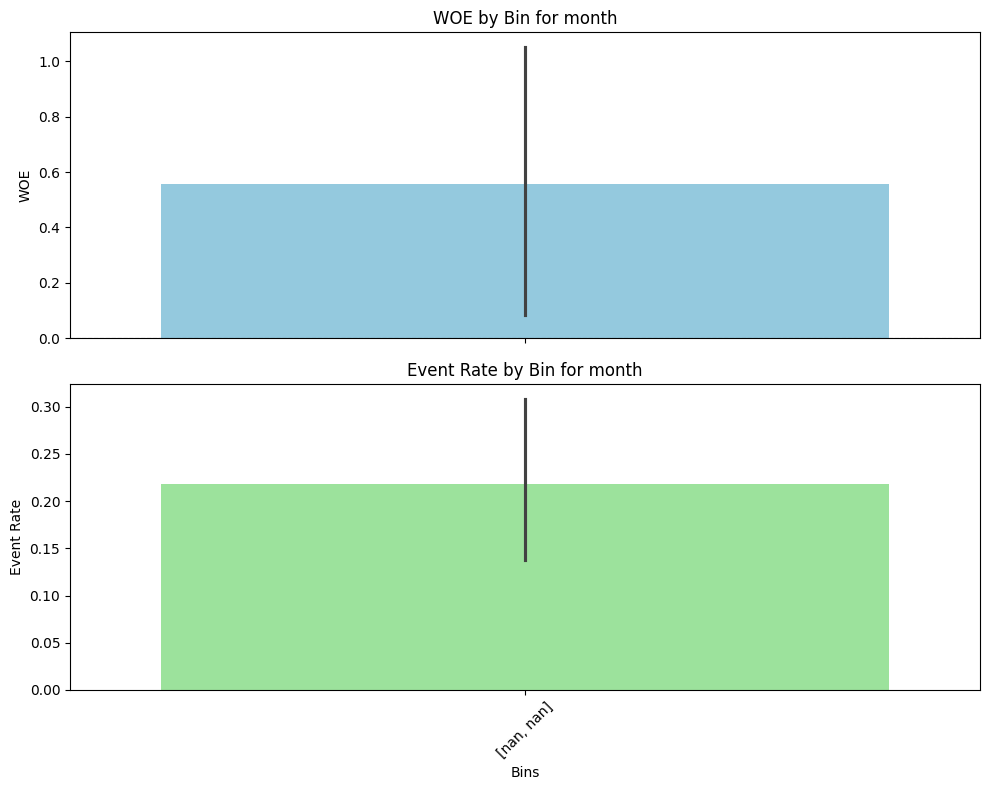

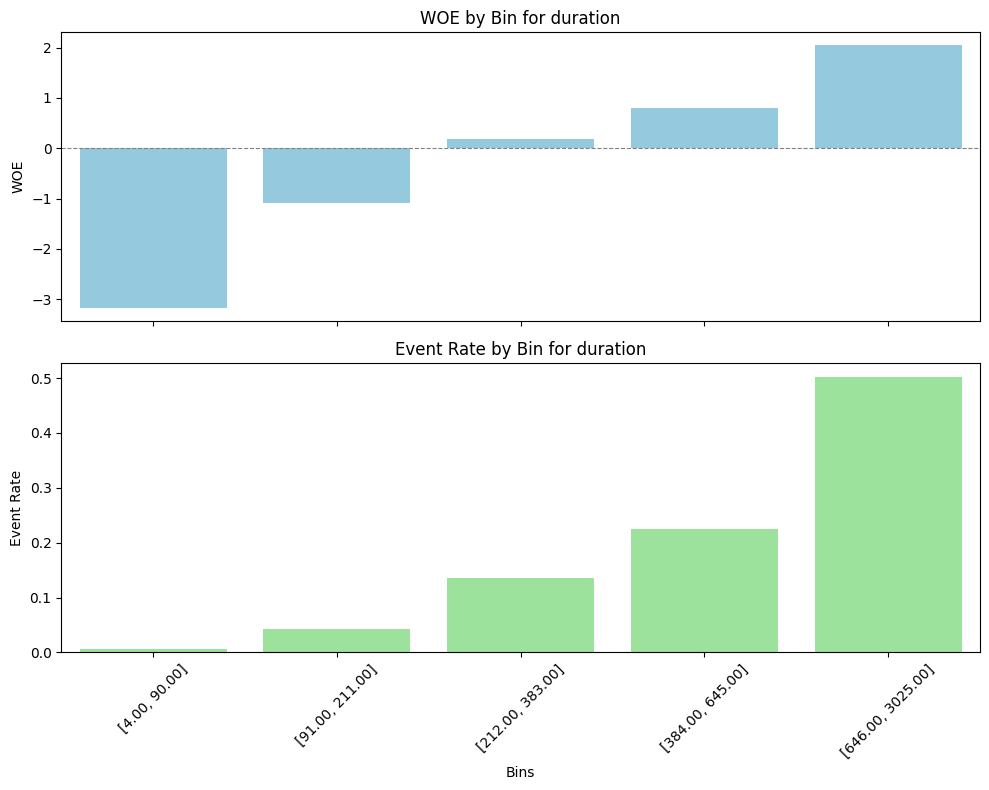

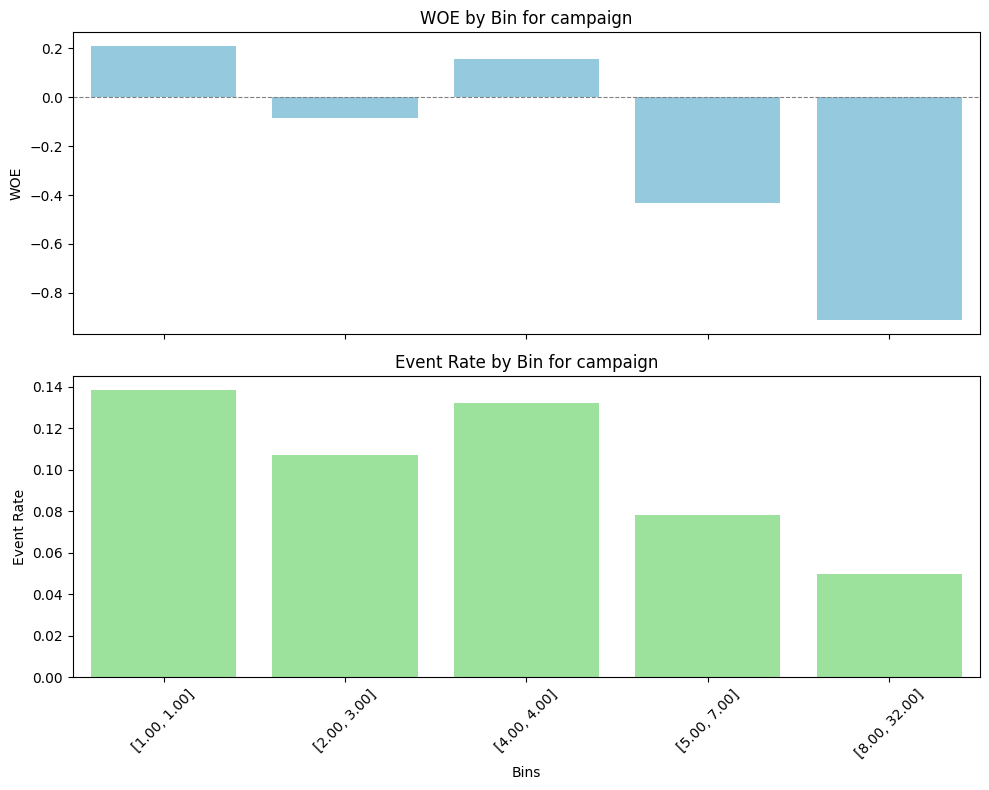

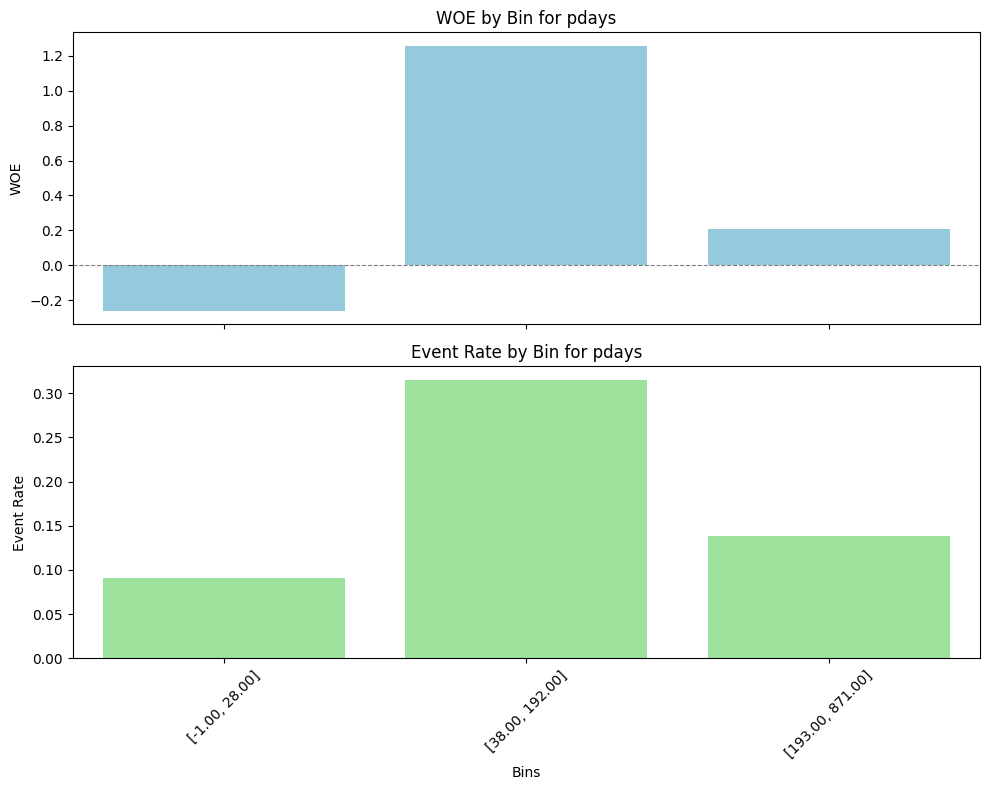

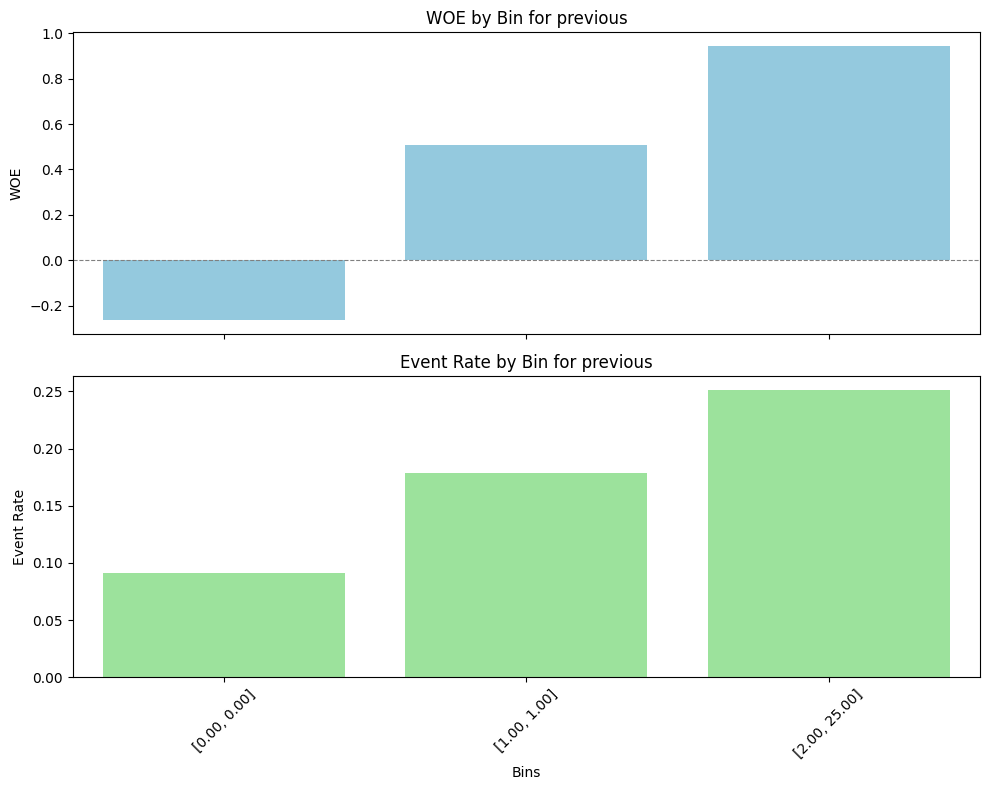

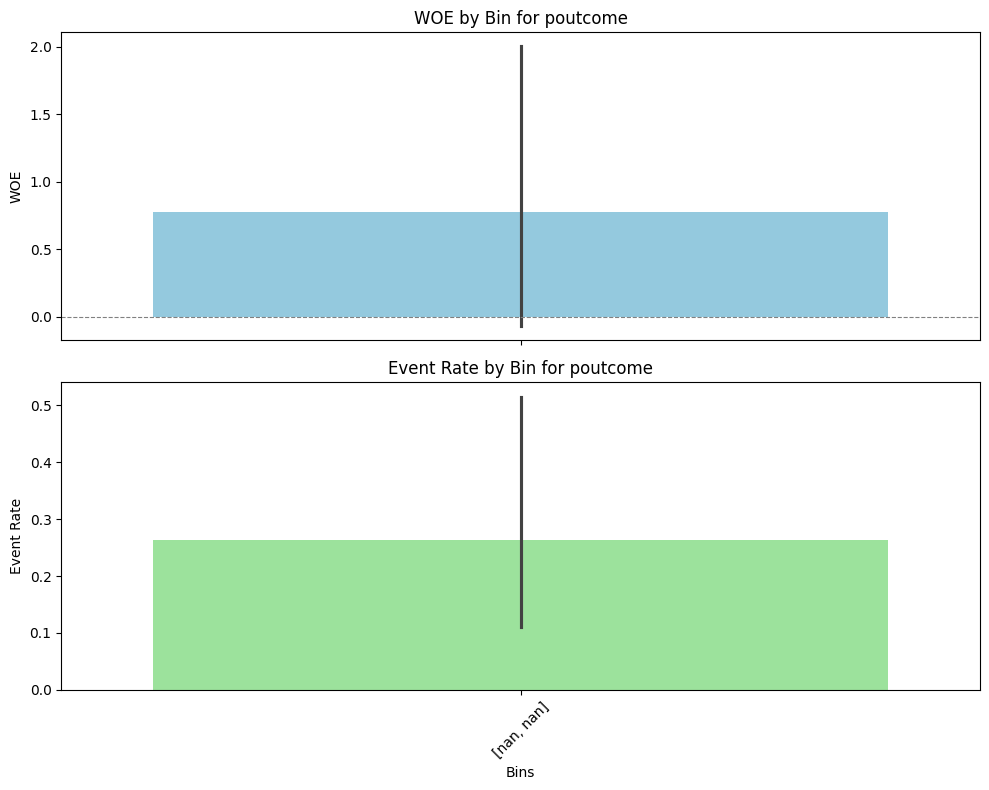

In [86]:
iv_df, iv = data_vars(df, df['target'], target_name='target')

# Visualize IV summary
plot_iv_summary(iv)

# Visualize binning details for each variable
for var_name in iv['VAR_NAME']:
    var_df = iv_df[iv_df['VAR_NAME'] == var_name]
    if 'MIN_VALUE' in var_df.columns:  # Numerical variable
        plot_numerical_bins(var_df, var_name)
    else:  # Categorical variable
        plot_categorical_bins(var_df, var_name)

In [87]:
print(df.columns)  # Show all column names


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')


In [88]:
final_iv, IV = data_vars(df,df.target)

In [89]:
final_iv

,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV_CONTRIBUTION,VAR_NAME,CATEGORY
0,19.0,29.0,482,74,0.153527,408,0.846473,0.142035,0.102051,0.330597,0.013218,age,NaN
1,30.0,55.0,3542,366,0.103331,3176,0.896669,0.702495,0.794397,-0.122945,0.011299,age,NaN
2,56.0,58.0,250,13,0.052000,237,0.948000,0.024952,0.059280,-0.865311,0.029704,age,NaN
3,59.0,87.0,245,68,0.277551,177,0.722449,0.130518,0.044272,1.081157,0.093246,age,NaN
4,NaN,NaN,478,58,0.121339,420,0.878661,0.111324,0.105053,0.057988,0.000364,job,admin.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NaN,NaN,197,38,0.192893,159,0.807107,0.072937,0.039770,0.606481,0.020115,poutcome,other
73,NaN,NaN,129,83,0.643411,46,0.356589,0.159309,0.011506,2.627999,0.388427,poutcome,success
74,NaN,NaN,3703,337,0.091007,3366,0.908993,0.646833,0.841921,-0.263598,0.051425,poutcome,unknown
75,NaN,NaN,3998,0,0.000000,3998,1.000000,0.000000,1.000000,-23.025851,23.025851,target,0


In [91]:
IV.sort_values('IV')

,VAR_NAME,IV
4,default,0.000016
3,education,0.031670
2,marital,0.039937
9,day,0.044868
7,loan,0.060563
12,campaign,0.067820
6,housing,0.106280
5,balance,0.120415
1,job,0.132101
0,age,0.147467


In [92]:
IV.to_csv('test.csv')

# Apply WOE values to your dataframe columns

The below code snippet can be used to apply the WOE values to your dataframe columns.

In [94]:
#sinc VI of default is 0
print(df['default'].value_counts())
final_iv[final_iv['VAR_NAME'] == 'default']

default
no     4443
yes      76
Name: count, dtype: int64


,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV_CONTRIBUTION,VAR_NAME,CATEGORY
23,NaN,NaN,4443,512,0.115237,3931,0.884763,0.982726,0.983242,-0.000525,2.709628e-07,default,no
24,NaN,NaN,76,9,0.118421,67,0.881579,0.017274,0.016758,0.030331,1.565384e-05,default,yes


*IV* is Almost 0, meaning the variable has no predictive power.

In [95]:
# List of variables to drop
drop_vars = ['default', 'loan', 'day', 'marital','education']

df.drop(columns=drop_vars, inplace=True)

print("Removed variables:", drop_vars)


Removed variables: ['default', 'loan', 'day', 'marital', 'education']


In [96]:
#> 0.5, suspicious relationship (Check once)
print(df[['duration', 'target']].corr())


          duration    target
duration  1.000000  0.401059
target    0.401059  1.000000


In [97]:
print(df.groupby('target')['duration'].describe())


         count        mean         std   min    25%    50%    75%     max
target                                                                   
0       3998.0  226.439970  210.324924   4.0   97.0  167.0  283.0  3025.0
1        521.0  552.742802  390.325805  30.0  260.0  442.0  755.0  2769.0


In [98]:
# This confirms that duration is strongly correlated with the outcome (y), meaning it’s likely determined after the event happens
df.drop(columns=['duration'], inplace=True)

In [99]:
transform_vars_list = df.columns.difference(['target'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [100]:
transform_vars_list

Index(['age', 'balance', 'campaign', 'contact', 'housing', 'job', 'month',
       'pdays', 'poutcome', 'previous'],
      dtype='object')

In [101]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd))
        except:
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd1))

In [102]:
df['contact'].value_counts()

,count
contact,
cellular,2894
unknown,1324
telephone,301


In [103]:
df['new_contact'].value_counts()

,count
new_contact,
0,4519


In [104]:
small_df = final_iv[final_iv['VAR_NAME'] == 'contact']

In [105]:
small_df

,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV_CONTRIBUTION,VAR_NAME,CATEGORY
35,NaN,NaN,2894,416,0.143746,2478,0.856254,0.798464,0.619810,0.253278,0.045249,contact,cellular
36,NaN,NaN,301,44,0.146179,257,0.853821,0.084453,0.064282,0.272913,0.005505,contact,telephone
37,NaN,NaN,1324,61,0.046073,1263,0.953927,0.117083,0.315908,-0.992572,0.197349,contact,unknown


In [106]:
# Display all WOE-transformed columns
woe_cols = [col for col in df.columns if col.startswith(transform_prefix)]
print(df[woe_cols].head())


    new_age  new_balance  new_campaign  new_contact  new_housing  new_job  \
0 -0.122945     0.144134      0.209226            0            0        0   
1 -0.122945     0.582239      0.209226            0            0        0   
2 -0.122945     0.144134      0.209226            0            0        0   
3 -0.122945     0.144134      0.157093            0            0        0   
4  1.081157    -0.481850      0.209226            0            0        0   

   new_month  new_pdays  new_poutcome  new_previous  
0          0  -0.261536             0     -0.263598  
1          0   0.210322             0      0.944212  
2          0   0.210322             0      0.510040  
3          0  -0.261536             0     -0.263598  
4          0  -0.261536             0     -0.263598  


In [107]:
df

,age,job,balance,housing,contact,month,campaign,pdays,previous,poutcome,...,new_age,new_balance,new_campaign,new_contact,new_housing,new_job,new_month,new_pdays,new_poutcome,new_previous
0,30,unemployed,1787,no,cellular,oct,1,-1,0,unknown,...,-0.122945,0.144134,0.209226,0,0,0,0,-0.261536,0,-0.263598
1,33,services,4789,yes,cellular,may,1,339,4,failure,...,-0.122945,0.582239,0.209226,0,0,0,0,0.210322,0,0.944212
2,35,management,1350,yes,cellular,apr,1,330,1,failure,...,-0.122945,0.144134,0.209226,0,0,0,0,0.210322,0,0.510040
3,30,management,1476,yes,unknown,jun,4,-1,0,unknown,...,-0.122945,0.144134,0.157093,0,0,0,0,-0.261536,0,-0.263598
4,59,blue-collar,0,yes,unknown,may,1,-1,0,unknown,...,1.081157,-0.481850,0.209226,0,0,0,0,-0.261536,0,-0.263598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,-333,yes,cellular,jul,5,-1,0,unknown,...,-0.122945,-0.041642,-0.430847,0,0,0,0,-0.261536,0,-0.263598
4517,57,self-employed,-3313,yes,unknown,may,1,-1,0,unknown,...,-0.865311,-0.041642,0.209226,0,0,0,0,-0.261536,0,-0.263598
4518,57,technician,295,no,cellular,aug,11,-1,0,unknown,...,-0.865311,-0.225856,-0.911016,0,0,0,0,-0.261536,0,-0.263598
4519,28,blue-collar,1137,no,cellular,feb,4,211,3,other,...,0.330597,0.144134,0.157093,0,0,0,0,0.210322,0,0.944212
